# Import necessary dependencies and settings

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats

%matplotlib inline
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor']= (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100

In [2]:
  from google.colab import files

uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


In [4]:
from google.colab import files

uploaded = files.upload()

Saving song_views.csv to song_views.csv


In [5]:
from google.colab import files

uploaded = files.upload()

Saving fcc_2016_coder_survey_subset.csv to fcc_2016_coder_survey_subset.csv


In [7]:
from google.colab import files

uploaded = files.upload()

Saving item_popularity.csv to item_popularity.csv


# Raw Measures

## Values

In [8]:
poke_df = pd.read_csv('Pokemon.csv', encoding = 'utf-8')

poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [9]:
poke_df[['HP', 'Attack', 'Defense']].head()

,HP,Attack,Defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43


In [10]:
poke_df[['HP', 'Attack', 'Defense']].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


## Counts

In [11]:
popsong_df = pd.read_csv('song_views.csv', encoding = 'utf-8')

popsong_df.head(10)

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0


# Binarization

In [12]:
watched = np.array(popsong_df['listen_count'])
watched[watched >= 1] = 1

popsong_df['watched'] = watched
popsong_df.head(10)

,user_id,song_id,title,listen_count,watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0


In [13]:
from sklearn.preprocessing import Binarizer

bn = Binarizer(threshold = 0.9)
pd_watched = bn.transform([popsong_df['listen_count']])[0]

popsong_df['pd_watched'] = pd_watched
popsong_df.head(11)

,user_id,song_id,title,listen_count,watched,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0,0


# Rounding

In [14]:
items_popularity = pd.read_csv('item_popularity.csv', 
                               encoding = 'utf-8')

items_popularity

,item_id,pop_percent
0,it_01345,0.98324
1,it_03431,0.56123
2,it_04572,0.12098
3,it_98021,0.35476
4,it_01298,0.92101
5,it_90120,0.81212
6,it_10123,0.56502


In [15]:
items_popularity['popularity_scale_10'] = np.array(np.round((
    items_popularity['pop_percent'] * 10
)), dtype = 'int')

items_popularity['popularity_scale_100'] = np.array(np.round((
    items_popularity['pop_percent'] * 100
)), dtype = 'int')

items_popularity

,item_id,pop_percent,popularity_scale_10,popularity_scale_100
0,it_01345,0.98324,10,98
1,it_03431,0.56123,6,56
2,it_04572,0.12098,1,12
3,it_98021,0.35476,4,35
4,it_01298,0.92101,9,92
5,it_90120,0.81212,8,81
6,it_10123,0.56502,6,57


# Interactions

In [16]:
atk_def = poke_df[['Attack', 'Defense']]

atk_def.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [17]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 2,
                        interaction_only = False,
                        include_bias = False)

res = pf.fit_transform(atk_def)
res

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  110.,    60., 12100.,  6600.,  3600.],
       [  160.,    60., 25600.,  9600.,  3600.],
       [  110.,   120., 12100., 13200., 14400.]])

In [18]:
pd.DataFrame(pf.powers_, 
             columns = ['Attack_degree', 'Defense_degree'])

,Attack_degree,Defense_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


In [19]:
intr_features = pd.DataFrame(res, 
                             columns = ['Attack', 'Defense', 
                                        'Attack^2', 'Attack x Defense',
                                        'Defense^2'])

intr_features.head()

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0


## Transforming new data in the future (during predictions)

In [20]:
new_df = pd.DataFrame([[95, 75], [121, 120], [77, 60]],
                      columns = ['Attack', 'Defense'])

new_df

,Attack,Defense
0,95,75
1,121,120
2,77,60


In [21]:
new_res = pf.transform(new_df)

new_intr_features = pd.DataFrame(new_res,
                                 columns = ['Attack', 'Defense',
                                            'Attack^2', 'Attack x Defense',
                                            'Defense^2'])

new_intr_features

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,95.0,75.0,9025.0,7125.0,5625.0
1,121.0,120.0,14641.0,14520.0,14400.0
2,77.0,60.0,5929.0,4620.0,3600.0


# Binning

In [22]:
fcc_survey_df = pd.read_csv('fcc_2016_coder_survey_subset.csv',
                            encoding = 'utf-8')

fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


## Fixed-width binning

### Developer age distribution

Text(0, 0.5, 'Frequency')

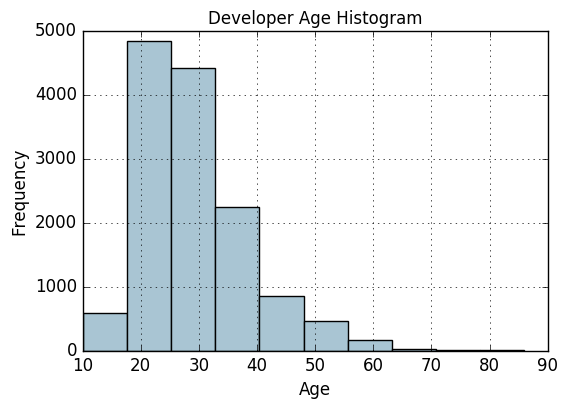

In [23]:
fig, ax = plt.subplots()

fcc_survey_df['Age'].hist(color = '#A9C5D3')
ax.set_title('Developer Age Histogram', fontsize = 12)
ax.set_xlabel('Age', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)

### Binning based on rounding

Age Range:    Bin


1.   0  -  9  : 0
2.   10 - 19  : 1
3.   20 - 29  : 2
4.   30 - 39  : 3
5.   40 - 49  : 4
6.   50 - 59  : 5
7.   60 - 69  : 6

... and so on




In [24]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(
    np.array(fcc_survey_df['Age']) / 10.))

fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


### Binning based on custom ranges

Age Range:    Bin


1.   0  -  15   : 1
2.   16 -  30   : 2
3.   31 -  45   : 3
4.   46 -  60   : 4
5.   61 -  75   : 5
6.   75 -  100  : 6

... and so on


In [25]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]

fcc_survey_df['Age_bin_custom_range'] = pd.cut(np.array(
    fcc_survey_df['Age']
), bins = bin_ranges)

fcc_survey_df['Age_bin_custom_label'] = pd.cut(np.array(
    fcc_survey_df['Age']
), bins = bin_ranges, labels = bin_names)

fcc_survey_df[['ID.x', 'Age', 'Age_bin_round',
               'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


## Quantile based binning

In [26]:
fcc_survey_df[['ID.x', 'Age', 'Income']].iloc[4:9]

,ID.x,Age,Income
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0
7,6dff182db452487f07a47596f314bddc,35.0,40000.0
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0


Text(0, 0.5, 'Frequency')

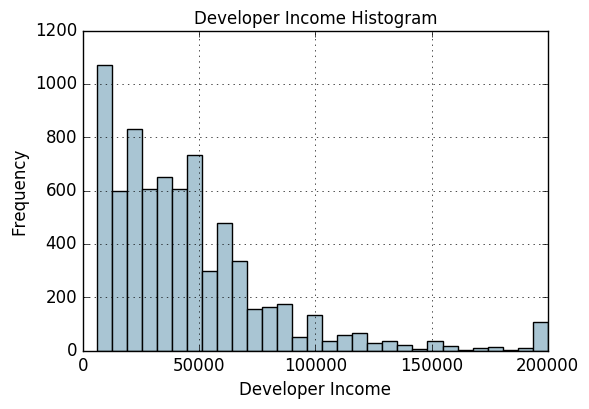

In [27]:
fig, ax = plt.subplots()

fcc_survey_df['Income'].hist(bins = 30, color = '#A9C5D3')
ax.set_title('Developer Income Histogram', fontsize = 12)
ax.set_xlabel('Developer Income', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)

In [28]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Text(0, 0.5, 'Frequency')

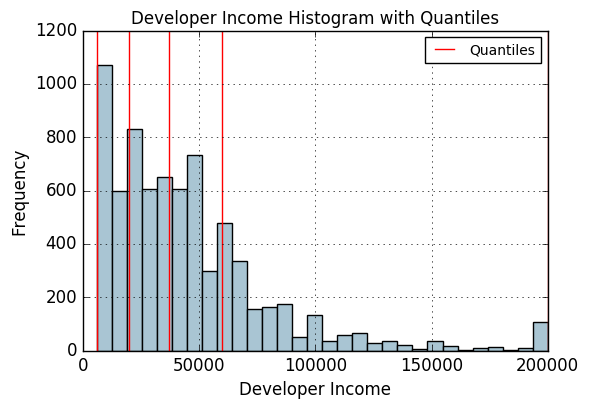

In [29]:
fig, ax = plt.subplots()

fcc_survey_df['Income'].hist(bins = 30, color = '#A9C5D3')

for quantile in quantiles:
  qvl = plt.axvline(quantile, color = 'r')
ax.legend([qvl], ['Quantiles'], fontsize = 10)
ax.set_title('Developer Income Histogram with Quantiles', 
             fontsize = 12)
ax.set_xlabel('Developer Income', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)

In [30]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']

fcc_survey_df['Income_quantile_range'] = pd.qcut(fcc_survey_df['Income'],
                                                 q = quantile_list)

fcc_survey_df['Income_quantile_label'] = pd.qcut(fcc_survey_df['Income'],
                                                 q = quantile_list,
                                                 labels = quantile_labels)

fcc_survey_df[['ID.x', 'Age', 'Income', 
               'Income_quantile_range', 'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


# Mathematical Transformations

## Log transform

In [31]:
fcc_survey_df['Income_log'] = np.log((1 + fcc_survey_df['Income']))

fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


Text(11.5, 450, '$\\mu$=10.43')

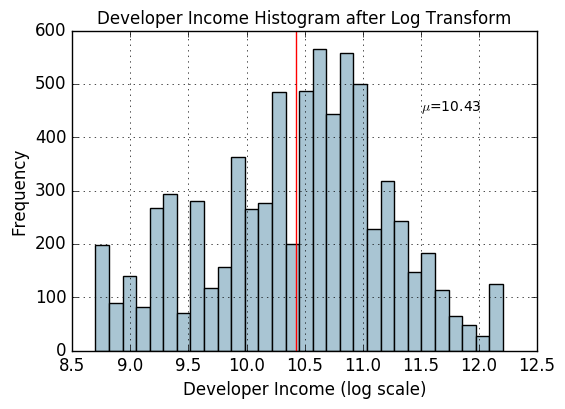

In [32]:
income_log_mean = np.round(np.mean(
    fcc_survey_df['Income_log']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins = 30, color = '#A9C5D3')
plt.axvline(income_log_mean, color = 'r')
ax.set_title('Developer Income Histogram after Log Transform',
             fontsize = 12)
ax.set_xlabel('Developer Income (log scale)', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
ax.text(11.5, 450, r'$\mu$=' + str(income_log_mean),
        fontsize = 10)

## Box-Cox transform

In [33]:
## Get optimal lambda value from non-null income values

income = np.array(fcc_survey_df['Income'])
income_clean = income[~np.isnan(income)]
l, opt_lambda = spstats.boxcox(income_clean)
print('Optimal lambda value: ', opt_lambda)

Optimal lambda value:  0.11799122497648248


In [34]:
fcc_survey_df['Income_boxcox_lambda_0'] = spstats.boxcox((
    1 + fcc_survey_df['Income']
), lmbda = 0)

fcc_survey_df['Income_boxcox_lambda_opt'] = spstats.boxcox(
    fcc_survey_df['Income'],
    lmbda = opt_lambda
)

fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log',
               'Income_boxcox_lambda_0', 
               'Income_boxcox_lambda_opt']].iloc[4:9]

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1038: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


,ID.x,Age,Income,Income_log,Income_boxcox_lambda_0,Income_boxcox_lambda_opt
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681,8.699681,15.180667
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660,10.596660,21.115340
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522,10.373522,20.346418
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660,10.596660,21.115340
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794,11.289794,23.637128


Text(24, 450, '$\\mu$=20.65')

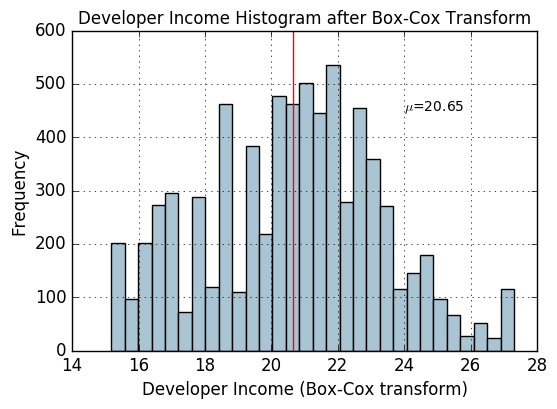

In [35]:
income_boxcox_mean = np.round(np.mean(
    fcc_survey_df['Income_boxcox_lambda_opt']
), 2)

fig, ax = plt.subplots()

fcc_survey_df['Income_boxcox_lambda_opt'].hist(bins = 30, color = '#A9C5D3')
plt.axvline(income_boxcox_mean, color = 'r')
ax.set_title('Developer Income Histogram after Box-Cox Transform',
             fontsize = 12)
ax.set_xlabel('Developer Income (Box-Cox transform)',
              fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
ax.text(24, 450, r'$\mu$=' + str(income_boxcox_mean),
        fontsize = 10)